In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/test.csv',parse_dates=['Flight_Date','Request_Date'])

In [3]:
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00+00:00,2019-07-29,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00+00:00,2019-07-29,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00+00:00,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00+00:00,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00+00:00,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
...,...,...,...,...,...,...,...,...
5119,2019-07-31 23:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5120,2019-08-01 11:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5121,2019-08-01 23:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€
5122,2019-08-02 11:00:00+00:00,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€


In [4]:
data['Departure_hour'] = pd.to_numeric(data['Departure_hour'])
data['Request_Date'] = data['Request_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
data['Flight_Date'] = data['Flight_Date'] + pd.to_timedelta(data['Departure_hour'], 'h')

In [5]:
data['Request_Date'] = pd.to_datetime(data['Request_Date'])
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00,2019-07-29 18:00:00,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00,2019-07-29 22:00:00,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00,2019-07-30 06:00:00,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00,2019-07-30 06:00:00,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00,2019-07-30 10:00:00,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
...,...,...,...,...,...,...,...,...
5119,2019-07-31 23:00:00,2019-09-10 10:00:00,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5120,2019-08-01 11:00:00,2019-09-10 10:00:00,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5121,2019-08-01 23:00:00,2019-09-10 10:00:00,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€
5122,2019-08-02 11:00:00,2019-09-10 10:00:00,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€


In [6]:
Duration_Time = data['Flight_Date'] - data['Request_Date']
Duration_Time = Duration_Time.apply(lambda x: x.total_seconds())     
Duration_Time = divmod(Duration_Time, 3600)[0]
data.insert(2, "Duration_Time", Duration_Time, True)

In [7]:
data

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
...,...,...,...,...,...,...,...,...,...
5119,2019-07-31 23:00:00,2019-09-10 10:00:00,971.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5120,2019-08-01 11:00:00,2019-09-10 10:00:00,959.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5121,2019-08-01 23:00:00,2019-09-10 10:00:00,947.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€
5122,2019-08-02 11:00:00,2019-09-10 10:00:00,935.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€


The average price for the period between request and flight


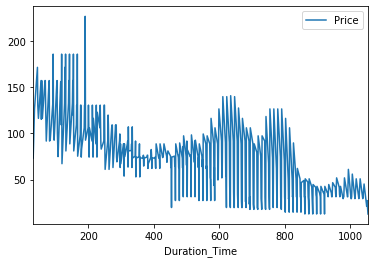

In [8]:
print("The average price for the period between request and flight")
fig, ax = plt.subplots()
df = data.groupby(['Duration_Time'])[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight


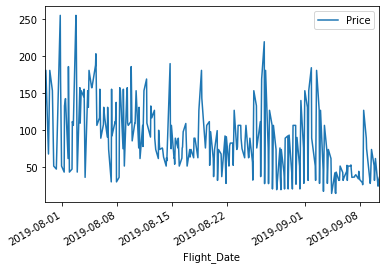

In [9]:
print("The average price for the time of the flight")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date'],)[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight and same route


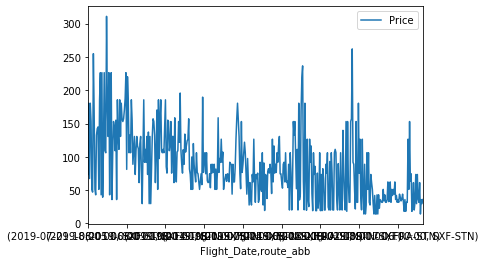

In [10]:
print("The average price for the time of the flight and same route")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

Plot how many flights per route


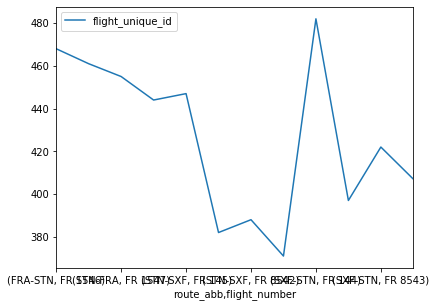

In [12]:
print("Plot how many flights per route")
fig, ax = plt.subplots()
df = data.groupby(['route_abb','flight_number']).count()['flight_unique_id'].plot(ax=ax, figsize=[15, 15])
ax.legend()
plt.show()

In [39]:
data = pd.read_csv('data/converted_train_2020_06_03_16-14-12.csv',parse_dates=['Flight_Date','Request_Date'])

In [40]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-06-03 11:00:00,2019-06-05 19:00:00,56.0,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,208.070000,259.070000,Monday,AM
1,1,2019-06-03 23:00:00,2019-06-05 19:00:00,44.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Monday,PM
2,2,2019-06-04 11:00:00,2019-06-05 19:00:00,32.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,AM
3,3,2019-06-03 11:00:00,2019-06-05 21:00:00,58.0,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,106.466899,186.536287,Monday,AM
4,4,2019-06-03 23:00:00,2019-06-05 21:00:00,46.0,21,2019-06-05 FR 147,STN-SXF,FR 147,223.37,£,223.37,186.536287,186.536287,Monday,PM
5,5,2019-06-04 11:00:00,2019-06-05 21:00:00,34.0,21,2019-06-05 FR 147,STN-SXF,FR 147,223.37,£,223.37,186.536287,186.536287,Tuesday,AM
6,6,2019-06-03 11:00:00,2019-06-05 22:00:00,59.0,22,2019-06-05 FR 8545,SXF-STN,FR 8545,22.17,€,22.17,22.170000,22.170000,Monday,AM
7,7,2019-06-03 23:00:00,2019-06-05 22:00:00,47.0,22,2019-06-05 FR 8545,SXF-STN,FR 8545,22.17,€,28.55,22.170000,28.550000,Monday,PM
8,8,2019-06-04 11:00:00,2019-06-05 22:00:00,35.0,22,2019-06-05 FR 8545,SXF-STN,FR 8545,28.55,€,50.99,28.550000,50.990000,Tuesday,AM
9,9,2019-06-03 23:00:00,2019-06-06 06:00:00,55.0,6,2019-06-06 FR 144,SXF-STN,FR 144,73.43,€,61.19,73.430000,61.190000,Monday,PM


The average price for the period between request and flight in euro


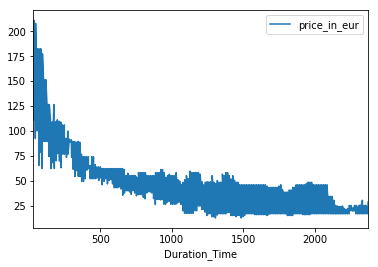

In [41]:
print("The average price for the period between request and flight in euro")
fig, ax = plt.subplots() 
df = data.groupby(['Duration_Time'])[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight and same route in euro


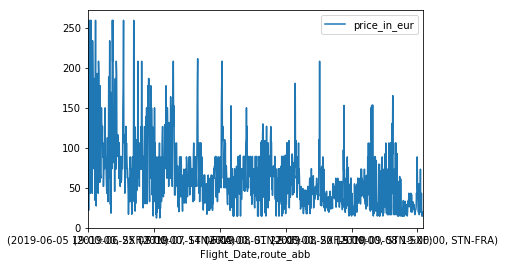

In [42]:
print("The average price for the time of the flight and same route in euro")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

In [45]:
#---------------------------------------------------------------

In [47]:
duncan = pd.read_csv('data/converted_train_2020_06_03_16-14-12.csv').loc[:, ["route_abb","Duration_Time", "price_in_eur"]]
duncan

,route_abb,Duration_Time,price_in_eur
0,SXF-STN,56.0,208.070000
1,SXF-STN,44.0,259.070000
2,SXF-STN,32.0,259.070000
3,STN-SXF,58.0,106.466899
4,STN-SXF,46.0,186.536287
5,STN-SXF,34.0,186.536287
6,SXF-STN,59.0,22.170000
7,SXF-STN,47.0,22.170000
8,SXF-STN,35.0,28.550000
9,SXF-STN,55.0,73.430000


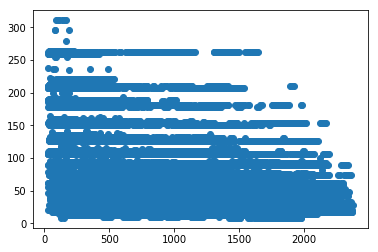

In [48]:
plt.scatter(x=duncan["Duration_Time"], y=duncan["price_in_eur"])

In [50]:
X = duncan.loc[:, ["Duration_Time"]]
X.head()

,Duration_Time
0,56.0
1,44.0
2,32.0
3,58.0
4,46.0


In [51]:
y = duncan.loc[:, "price_in_eur"]
y.head()

0    208.070000
1    259.070000
2    259.070000
3    106.466899
4    186.536287
Name: price_in_eur, dtype: float64

In [56]:
print ("Below, we fit our linear model and print all the  θˆ  coefficients of the model (from the equation above) after the model has\nbeen fit to the data. Note that these are our sample coefficients.")

Below, we fit our linear model and print all the  θˆ  coefficients of the model (from the equation above) after the model has
been fit to the data. Note that these are our sample coefficients.


In [57]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()
linear_model.fit(X, y)

print("""
intercept: %.2f
Duration_Time:    %.2f
""" % (tuple([linear_model.intercept_]) + tuple(linear_model.coef_)))


intercept: 102.47
Duration_Time:    -0.04



In [58]:
def simple_resample(n): 
    return(np.random.randint(low = 0, high = n, size = n))

def bootstrap(boot_pop, statistic, resample = simple_resample, replicates = 10000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates

In [60]:
def educ_coeff(data_array):
    X = data_array[:, 0:]
    y = data_array[:, 0]
    
    linear_model = lm.LinearRegression()
    model = linear_model.fit(X, y)
    theta_educ = model.coef_[1]

    return theta_educ

data_array = duncan.loc[:, ["price_in_eur", "Duration_Time"]].values

theta_hat_sampling = bootstrap(data_array, educ_coeff)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


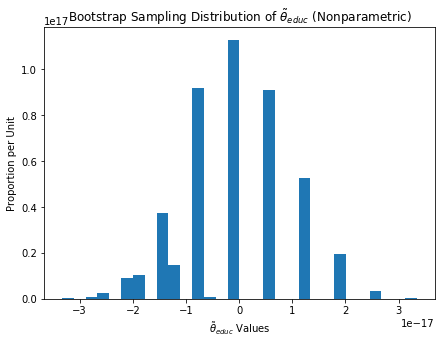

In [61]:
plt.figure(figsize = (7, 5))
plt.hist(theta_hat_sampling, bins = 30, normed = True)
plt.xlabel("$\\tilde{\\theta}_{educ}$ Values")
plt.ylabel("Proportion per Unit")
plt.title("Bootstrap Sampling Distribution of $\\tilde{\\theta}_{educ}$ (Nonparametric)");
plt.show()

In [62]:
left_confidence_interval_endpoint = np.percentile(theta_hat_sampling, 2.5)
right_confidence_interval_endpoint = np.percentile(theta_hat_sampling, 97.5)

left_confidence_interval_endpoint, right_confidence_interval_endpoint

(-1.9997091751988508e-17, 2.0000291990279922e-17)

In [63]:
# We will use the statsmodels library in order to find the standard error of the coefficients
import statsmodels.api as sm
ols = sm.OLS(y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.HC0_se

Duration_Time    0.000137
dtype: float64

In [64]:
left_confidence_interval_endpoint_normal = 0.55 - (1.96*0.12)
right_confidence_interval_endpoint_normal = 0.55 + (1.96*0.12)
left_confidence_interval_endpoint_normal, right_confidence_interval_endpoint_normal

(0.3148000000000001, 0.7852)